CREDIT CARD FRADULENT TRANSACTION USING ARTIFICAL NEURAL NETWORKS

Data : https://www.kaggle.com/mlg-ulb/creditcardfraud

The data is obtained from Kaggle and can be downloaded using above link.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from pandas_datareader import data

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [21]:
data = pd.read_csv('creditcard.csv')

In [22]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [23]:
data = data.drop('Time', axis = 1) #we are dropping time because it is just the time fro first transaction and it does not determine if a transaction is valid or not

In [24]:
data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
#taking the features in X and the class in y variable
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [34]:
#printing X and y
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


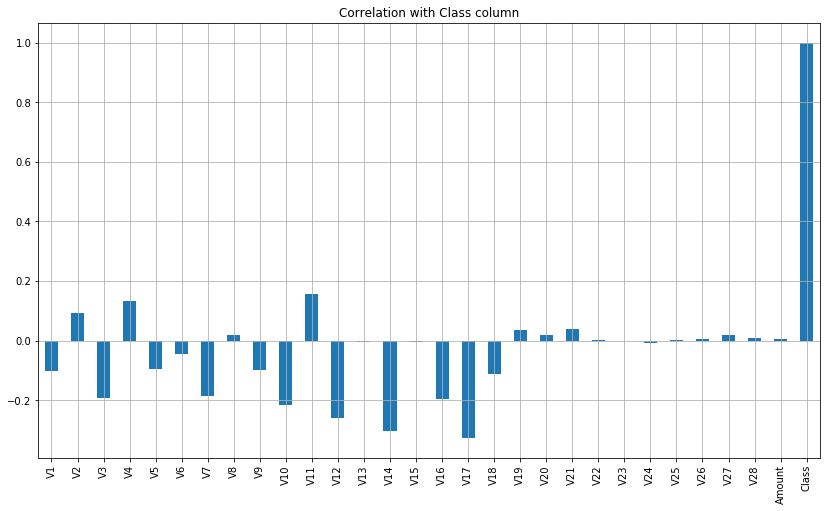

In [38]:
#Draw a bar graph of correlation between each feature and class variable
data.corrwith(data.Class).plot.bar(figsize = (14, 8), title = "Correlation with Class column", grid = True)

In [43]:
#finding range of each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
X.apply(minMax)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
min,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.00
max,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16


In [45]:
#From above output we can see that we have to scale only amount. So scaling amount to reduce its range
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1, 1))
X.apply(minMax)

C:\Users\gowth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
min,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.353229
max,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,102.362243


In [50]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(227845, 29) (227845, 1) (56962, 29) (56962, 1)


In [64]:
model = Sequential()
model.add(Dense(activation = 'relu', units = 15, input_dim = 29))
model.add(Dense(activation = 'relu', units = 15))
model.add(Dense(activation = 'sigmoid', units  = 1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 15)                450       
_________________________________________________________________
dense_12 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 16        
Total params: 706
Trainable params: 706
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_fit_data = model.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
227845/227845 [==============================] - 3s 14us/step - loss: 0.0035 - accuracy: 0.9981
Epoch 2/100
227845/227845 [==============================] - 3s 12us/step - loss: 0.0018 - accuracy: 0.9982
Epoch 3/100
227845/227845 [==============================] - 3s 12us/step - loss: 0.0018 - accuracy: 0.9982
Epoch 4/100
227845/227845 [==============================] - 3s 12us/step - loss: 0.0018 - accuracy: 0.9982
Epoch 5/100
227845/227845 [==============================] - 3s 13us/step - loss: 0.0018 - accuracy: 0.9982
Epoch 6/100
227845/227845 [==============================] - 3s 13us/step - loss: 0.0018 - accuracy: 0.9982
Epoch 7/100
227845/227845 [==============================] - 3s 13us/step - loss: 9.1527e-04 - accuracy: 0.9991
Epoch 8/100
227845/227845 [==============================] - 3s 13us/step - loss: 5.5356e-04 - accuracy: 0.9994
Epoch 9/100
227845/227845 [==============================] - 3s 14us/step - loss: 5.3366e-04 - accuracy: 0.9994
Epoch 10/100
227

In [66]:
pred = model.predict(X_test)
pred = pred >= 0.5

In [67]:
score = model.evaluate(X_test, y_test)
print(score) 

56962/56962 [==============================] - 1s 14us/step
[0.0004994165700310104, 0.9994557499885559]
